<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-Libraries" data-toc-modified-id="Loading-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading Libraries</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></div>

# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings("ignore")


# Loading Data

In [2]:
df = pd.read_csv('Datasets/applicant.csv',names=[
        "Age","Workclass","fnlwgt","Education","Education-Num","Marital Status",
        "Occupation","Relationship","Race","Gender","Capital Gain","Capital Loss",
        "Hours per week","Country","Target"],
    sep=r'\s*,',
    engine='python',
    na_values='?')
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df = df.replace('?',np.nan)
df = df.replace(' ?',np.nan)

In [6]:
for i in list(df.columns):
    print(i)
    
    print(df.loc[:,i].unique())
    print('=====================================================')

Age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
Education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Education-Num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Marital Status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op

In [7]:
df.isna().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Gender               0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.shape

(30162, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30162 non-null  int64 
 1   Workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   Education       30162 non-null  object
 4   Education-Num   30162 non-null  int64 
 5   Marital Status  30162 non-null  object
 6   Occupation      30162 non-null  object
 7   Relationship    30162 non-null  object
 8   Race            30162 non-null  object
 9   Gender          30162 non-null  object
 10  Capital Gain    30162 non-null  int64 
 11  Capital Loss    30162 non-null  int64 
 12  Hours per week  30162 non-null  int64 
 13  Country         30162 non-null  object
 14  Target          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Visualization

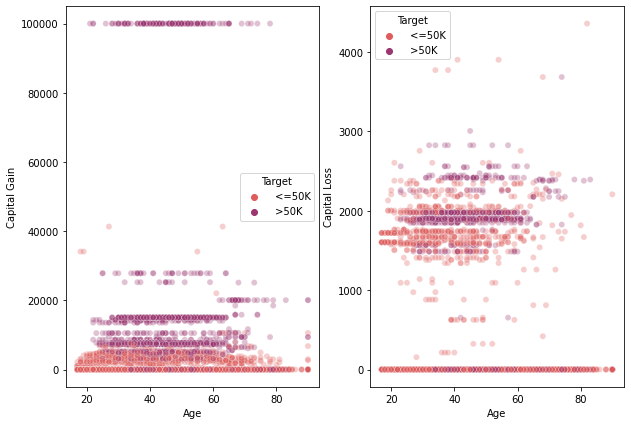

In [10]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.scatterplot(data = df , x = 'Age' , y = 'Capital Gain',hue = 'Target',palette='flare',alpha=0.3);
plt.subplot(1,2,2)
sns.scatterplot(data = df , x = 'Age' , y = 'Capital Loss',hue = 'Target',palette='flare',alpha = 0.3);

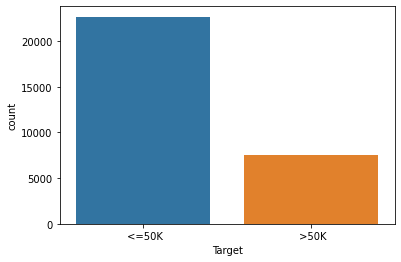

In [11]:
sns.countplot(data = df , x = 'Target');


<strong> <font color= "green"> The dataset is imbalanced

# Data Preprocessing

In [12]:
# let's make age  as category
df['Age'] = pd.cut(df['Age'],bins = 20,labels = ["Age_" + str(i) for i in range(20)])


In [13]:
cat_features = []
num_features = []
for i in list(df.columns):
    if (df.dtypes[i]) ==('int64'):
        num_features.append(i)
    else:
        cat_features.append(i)
        

In [14]:
num_features

['fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week']

In [15]:
cat_features

['Age',
 'Workclass',
 'Education',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Gender',
 'Country',
 'Target']

In [16]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler
sc = StandardScaler()
oe = OrdinalEncoder()
le = LabelEncoder()

In [17]:
df[cat_features] = oe.fit_transform(df[cat_features])



In [18]:
X = df.drop('Target',axis = 1)
y = df['Target']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [20]:
X_train.shape,y_train.shape

((24129, 14), (24129,))

In [21]:

X_train.loc[:,num_features] = sc.fit_transform(X_train.loc[:,num_features])
X_test.loc[:,num_features] = sc.transform(X_test.loc[:,num_features])



# Modelling

In [22]:
from sklearn.svm import SVC
sv = SVC(kernel = 'rbf',C = 1.0)
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)

# Evaluation

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred , y_test)

0.8010939830929885

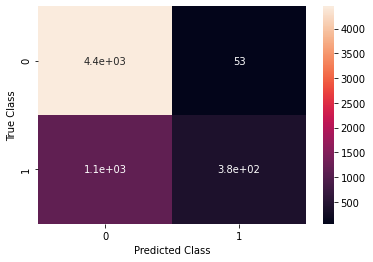

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('True Class')
plt.xlabel('Predicted Class');